# SPIRL Fall 2021 Course -- Week 4 (Oct 12)

Today's main topic is the **Monte Carlo (MC)**. But before we dive into that, 
we will need to learn something else first:

1. Python Numpy Random Generator: `np.random.default_rng()`
2. Plot histogram
3. Monte Carlo -- Uncertainty Propagation
4. Monte Carlo -- Bootstrapping

## Readings (optional)

If you find this week's material new or challenging, you may want to read through some or all the following resources while working on your assignment:

- [SPIRL Ch. 3.6. Conditionals](https://cjtu.github.io/spirl/python_conditionals.html#conditionals)
- [Numpy Random Generator](https://numpy.org/doc/stable/reference/random/generator.html)


October 12, 2021\
Instructor: Shih-Yun Tang

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Python Numpy Random Generator: `np.random.default_rng()`

### The pseudorandom number generator (PRNG)
It might sounds easy to come up with a random number, but, it is... really not the case.
Even for human, there will always be some kind of bias of the "random" number you choose, 
not to mention that machine are deterministic. Thereofore, we use the
**pseudorandom number generator (PRNG)** to help us do the job.

See what Wikipedia tell us about the PRNG:
> A pseudorandom number generator (PRNG), also known as a deterministic random bit generator (DRBG), is an algorithm for generating a sequence of numbers whose properties approximate the properties of sequences of random numbers. The PRNG-generated sequence is not truly random, because it is completely determined by an initial value, called the PRNG's seed (which may include truly random values).

See more on [Pseudorandom number generator - Wikipedia](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)

### Numpy Random Generator

In python, the Pseudorandom number generator used as default is the **PCG-64 pseudo-random number generator**. If you are interested, see more on [numpy.random.PCG64](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64).
However, for now, if we want to generate any radom number, we can just use the default random number generator (`default_rng`). 

See what kind of random data can be draw from `default_rng` on [Simple random data](https://numpy.org/doc/stable/reference/random/generator.html#simple-random-data)

In [3]:
# Initiative the random number generator
rng = np.random.default_rng()

Let's first try to genertae random intergers with

```[note]
...
    integers(low, high=None, size=None, dtype=np.int64, endpoint=False)
    
    Return random integers from `low` (inclusive) to `high` (exclusive), or
    if endpoint=True, `low` (inclusive) to `high` (inclusive). Replaces
    `RandomState.randint` (with endpoint=False) and
    `RandomState.random_integers` (with endpoint=True)
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype. If `high` is None (the default), then results are
    from 0 to `low`.
...
```

In [4]:
# Draw random intergers from the range `draw_range` `draw_times` times.
draw_range = (0, 10)
draw_times = 10

random_ints = rng.integers(*draw_range, 
                            draw_times)

print(random_ints)

[0 7 2 4 8 6 9 0 4 8]


Now use `for` loop to run it many times to see if any is duplicated

In [5]:
for i in range(10):
    rng = np.random.default_rng()
    
    random_ints = rng.integers(*draw_range, 
                                draw_times)
    
    print(f'run {i} give: ', random_ints)

run 0 give:  [5 8 9 9 4 0 3 2 4 8]
run 1 give:  [8 8 6 1 7 9 2 0 5 6]
run 2 give:  [8 4 1 2 7 6 2 5 1 7]
run 3 give:  [3 3 8 0 2 8 8 8 3 0]
run 4 give:  [1 5 7 1 3 1 2 3 0 3]
run 5 give:  [8 2 9 1 7 0 7 2 5 7]
run 6 give:  [8 1 5 8 2 6 5 7 2 5]
run 7 give:  [7 3 8 3 5 4 3 3 9 6]
run 8 give:  [0 9 1 2 9 3 7 2 3 3]
run 9 give:  [6 4 4 5 8 9 6 0 5 5]


But, as said in the beginning, the random numbers from the generator are not REAL random. 
They are generated based on a **seed** value.
Therefore, as long as you know that seed, you can get your random number back.

> However, might not be true between operating system or even different version of NumPy.

In [6]:
draw_range = (0, 10)
draw_times = 10
seed = 100
 
for i in range(10):
    rng = np.random.default_rng(seed) # this time put in the seed value
    
    random_ints = rng.integers(*draw_range, 
                                draw_times)
    
    print(f'run {i} give: ', random_ints)

run 0 give:  [7 8 1 5 0 2 4 0 5 9]
run 1 give:  [7 8 1 5 0 2 4 0 5 9]
run 2 give:  [7 8 1 5 0 2 4 0 5 9]
run 3 give:  [7 8 1 5 0 2 4 0 5 9]
run 4 give:  [7 8 1 5 0 2 4 0 5 9]
run 5 give:  [7 8 1 5 0 2 4 0 5 9]
run 6 give:  [7 8 1 5 0 2 4 0 5 9]
run 7 give:  [7 8 1 5 0 2 4 0 5 9]
run 8 give:  [7 8 1 5 0 2 4 0 5 9]
run 9 give:  [7 8 1 5 0 2 4 0 5 9]


## Plot histogram with `plt.hist`

```[note]
hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)
    Plot a histogram.
...
    Returns
    -------
    n : array or list of arrays
        The values of the histogram bins. See *density* and *weights* for a
        description of the possible semantics.  If input *x* is an array,
        then this is an array of length *nbins*. If input is a sequence of
        arrays ``[data1, data2,..]``, then this is a list of arrays with
        the values of the histograms for each of the arrays in the same
        order.  The dtype of the array *n* (or of its element arrays) will
        always be float even if no weighting or normalization is used.
    
    bins : array
        The edges of the bins. Length nbins + 1 (nbins left edges and right
        edge of last bin).  Always a single array even when multiple data
        sets are passed in.
    
    patches : list or list of lists
        Silent list of individual patches used to create the histogram
        or list of such list if multiple input datasets.
...
```



Let's try to verify if we truely get random values with the help of `plt.historgram`

In [7]:
def set_plot_axis_label(axes, xlabel, ylabel):
    axes.tick_params(axis='both', which ='both', labelsize='small', right=True, top=True, direction='in')   
    axes.set_xlabel(xlabel, size='medium', style='normal', family='sans-serif', fontname='Helvetica')
    axes.set_ylabel(ylabel, size='medium', style='normal', family='sans-serif', fontname='Helvetica')

No handles with labels found to put in legend.


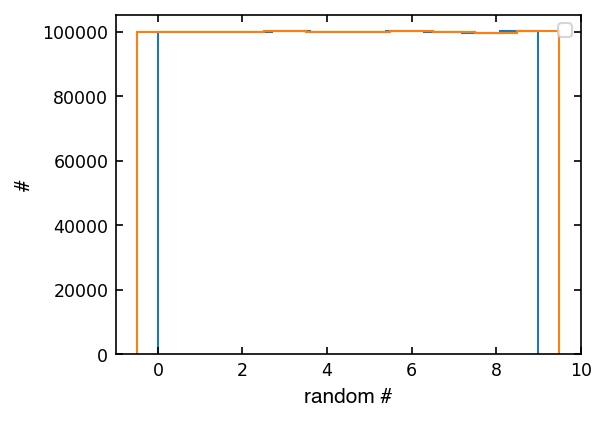

In [66]:
# random number setup
draw_range = (0, 10)
draw_times = 1000000

rng = np.random.default_rng()  
random_ints = rng.integers(*draw_range, 
                            draw_times)

# plotting
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax1 = f.subplots(1, 1)

# default
n, edges, _ = ax1.hist(random_ints, histtype='step')
# a better way by constraining the edge of bins and the number of bins
n, edges, _ = ax1.hist(random_ints, range = (-0.5, 9.5), bins=10, histtype='step')

ax1.legend(fontsize='small')
xlabel = 'random #'; ylabel = '#'
set_plot_axis_label(ax1, xlabel, ylabel)

In [60]:
print(f'Number in each bins: {n}')
print(f'Edges of each bin: {edges}')

Number in each bins: [ 98. 101.  96.  96. 106. 107.  94. 100. 103.  99.]
Edges of each bin: [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]


Now, let's overplot these data points back to the histogram.
But, before that, we need to find out the center values of the each bins.

### [Short Quiz] Find the bin centers from `edges` array 

Try to code up some lines of code to turn
```python
edges = [-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5]
```
into
```python
bin_center = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
```

Apparently, simply type in the answer or just copy the list above is... cheating...

In [ ]:
# put you code here, you have 5 mins


In [61]:
# Answer 1 -- using the for loop

bin_center = []
for i in range(len(edges)-1):
    
    bin_center.append(
        (edges[i] + edges[i+1]) / 2
    )

print(bin_center)  

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


### List comprehension

Creating a list with `for` loop in it.
It is hard to explain... so let's just see some an example:

In [62]:
a_list = [1, 2, 3, 4, 5, 6, 7, 8]

a_plus_1_list = [i+1 for i in a_list]
print(a_plus_1_list)

[2, 3, 4, 5, 6, 7, 8, 9]


In [63]:
# Answer 2 -- using the list comprehension

bin_center = [(edges[i] + edges[i+1]) / 2 for i in range(len(edges)-1)]
print(bin_center)  

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [64]:
# Answer 3 -- array slicing (recommended)

bin_center = (edges[:-1] + edges[1:])/2
print(bin_center) 

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


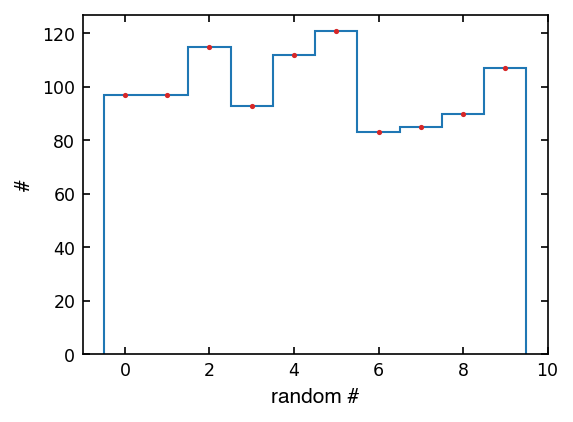

In [65]:
# random number setup
draw_range = (0, 10)
draw_times = 1000

rng = np.random.default_rng()       # this time put in the seed value    
random_ints = rng.integers(*draw_range, 
                            draw_times)

# plotting
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax1 = f.subplots(1, 1)

# plot the histogram
n, edges, _ = ax1.hist(random_ints, range = (-0.5, 9.5), bins=10, histtype='step')

bin_center = (edges[:-1] + edges[1:])/2
ax1.plot(bin_center, n, '.', ms=3, c='tab:red')

xlabel = 'random #'; ylabel = '#'
set_plot_axis_label(ax1, xlabel, ylabel)

## Python Numpy Random Generator -- random draw from a model distrbution

See what kind of distrebution can Numpy Random Generator draw from:
[Distributions](https://numpy.org/doc/stable/reference/random/generator.html#distributions)

Below we will do the demo with the normal (Gaussian) distrbution.

```[note]
normal(...) method of numpy.random._generator.Generator instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution.
    scale : float or array_like of floats
        Standard deviation (spread or "width") of the distribution. Must be
        non-negative.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (default),
        a single value is returned if ``loc`` and ``scale`` are both scalars.
        Otherwise, ``np.broadcast(loc, scale).size`` samples are drawn.
...
```

In [14]:
# random number setup
draw_mean_std = (10, 0.2)
draw_times = 10

rng = np.random.default_rng()
nor_distrbution_array = rng.normal(*draw_mean_std,
                                    draw_times)

print(nor_distrbution_array)

[ 9.89819495  9.60360784 10.4207092  10.11347965  9.93005851 10.24416547
 10.44233921 10.03495739  9.75492237 10.13622546]


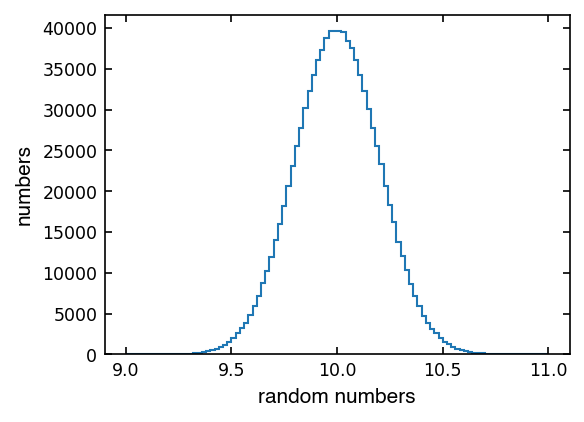

In [69]:
# random number setup
draw_mean_std = (10, 0.2)
draw_times = 1000000

rng = np.random.default_rng()
nor_distrbution_array = rng.normal(*draw_mean_std,
                                    draw_times)

# plotting 
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax = f.subplots(1, 1)

n, edges, _ = ax.hist(nor_distrbution_array, histtype='step', range=(9, 11), bins=100)

xlabel = 'random numbers'
ylabel = 'numbers'
set_plot_axis_label(ax, xlabel, ylabel)

## Monte Carlo -- Uncertainty (error) Propagation

Simple error propagation can be done quickly by hand with equations below:

![Uncertainty Propagation](http://science.clemson.edu/physics/labs/tutorials/errorp/eptable.gif)

(from Clemson University)

But, what if you have something like
$$
\rho = \frac{m}{V} = \frac{m}{\pi r^2 (h/3)} = \frac{3m}{\pi r^2 h}
$$
How fast can you get the error of the density ($\rho$) propagated from errors of $m$, $r$, and $h$?

|                 | units | values | uncertainty ($\sigma$) |
|-----------------|:-----:|:------:|:----------------------:|
| Mass (m)        |   g   |  55.5  |          4.52          |
| Cone radius (r) |   cm  |  14.2  |          1.11          |
| Cone height (h) |   cm  |   9.9  |          0.59          |

modified from [Steve Spicklemire's youtube video](https://www.youtube.com/watch?v=V4U6RFI6HW8&t=298s)

Before we try out the MC error propagation on the density function, let's start with something simple:
$$
c = a + b
$$
where $a = 5.5 \pm 0.22$, and $b = 7.8 \pm 2.54$. We can get the uncertainty of $c$ via 
the normal way by using the equation above:

In [83]:
c_unc = np.sqrt(0.22**2 + 2.54**2)

print(f'The c value has an uncertainty of {c_unc:1.3f}')

The c value has an uncertainty of 2.550


However, if to do it using the MC method...

Usually, when the parameter, say $a$, only come with one uncertainty value, that uncertainty is considered 
as a Gaussian noise, i.e., the standard deviation (std). Therefore, with the mean and the std of $a$, we 
can reconstruct the underlying profile of $a$. By randomly draw new values of $a$ based on the Gaussian 
distribution, we get all possible values of $a$!

If you are still confused, think about how do we normally get the mean and the std for a value? We do lots
of measurements of it and then calculate their mean and std, right? So, the Gaussian distribution we reconstructed
from teh mean and the std are just helping us generating those **measurements**.

By generating lots, say 1000, of random possible values of $a$ and $b$, we can get 
go through the calculation of all 1000 sets of them and get 1000 of $c$ values.
And now, we just need to calculate the std of those 1000 $c$, we get the uncertainty of $c$!

In [84]:
draw_times = 100
rng = np.random.default_rng()

a_mc_array = rng.normal(5.5, 0.22, draw_times)
b_mc_array = rng.normal(7.8, 2.54, draw_times)


c_mc_array = a_mc_array + b_mc_array
c_unc_mc = np.std(c_mc_array)
print(f'The c value has an uncertainty of {c_unc_mc:1.3f}')

The c value has an uncertainty of 2.780


The larger the draw_times you use, the more stable the c_unc_mc can be.

Let's write up some code to see what draw_times we need to get stable c_unc_mc.
Let's day stable means the difference of c_unc_mc between two number of draws is 
$<$ 1e-6 for now.

In [86]:
c_unc_mc_old = 0

for draw_times in np.arange(100, 1000000, 1000):
    a_mc_array = rng.normal(5.5, 0.22, draw_times)
    b_mc_array = rng.normal(7.8, 2.54, draw_times)

    c_mc_array = a_mc_array + b_mc_array
    c_unc_mc_new = np.std(c_mc_array)
    
    if c_unc_mc_old == 0:
        c_unc_mc_old = c_unc_mc_new
    else:
        differ = np.abs(c_unc_mc_old - c_unc_mc_new)
        print('\r', f'draw_times of {draw_times} give differ of {differ:1.7f}', end = '')
        
        if differ < 1e-6: break
        
    c_unc_mc_old = c_unc_mc_new

print(f'\n The uncertainty of c is about: {c_unc_mc_new:1.3f}')
    

 draw_times of 999100 give differ of 0.0039181
 The uncertainty of c is about: 2.546


## [Challenge assignment] 

1. Find a better/faster way to reach a stable `c_unc_mc` value
2. Use a more strict stable condition: `differ < 1e-6` must meet for 10 consecutive `draw_times`

### [Hands-on] Get the uncertainty for $c$

$$
\rho = \frac{m}{V} = \frac{m}{\pi r^2 (h/3)} = \frac{3m}{\pi r^2 h}
$$

|                 | units | values | uncertainty ($\sigma$) |
|-----------------|:-----:|:------:|:----------------------:|
| Mass (m)        |   g   |  55.5  |          4.52          |
| Cone radius (r) |   cm  |  14.2  |          1.11          |
| Cone height (h) |   cm  |   9.9  |          0.59          |


In [19]:
# [your code here]

## Monte Carlo -- Bootstrapping

Modified from [Introduction to Statistical Methodology, Second Edition Chaper 3](https://bookdown.org/dereksonderegger/570/3-confidence-intervals-via-bootstrapping.html)

In [21]:
import pandas as pd
df = pd.read_csv('https://www.lock5stat.com/datasets3e/FloridaLakes.csv')
AvgMercury = df['AvgMercury'].to_numpy()

Text(0.5, 1.0, 'Mercury level in Florida Lakes')

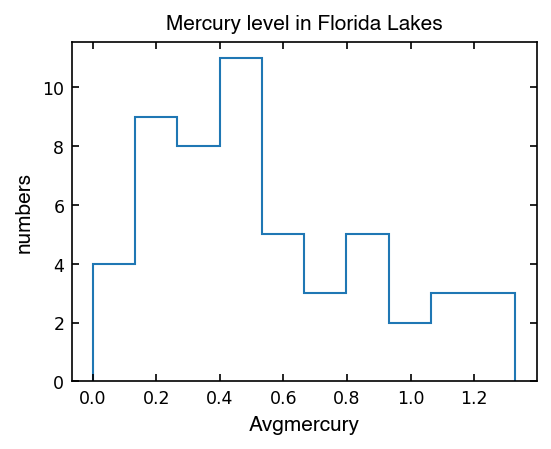

In [22]:
# plotting 
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax = f.subplots(1, 1)

ax.hist(AvgMercury, histtype='step', range=(0, np.max(AvgMercury)), bins=10)

xlabel = 'Avgmercury'; ylabel = 'numbers'
set_plot_axis_label(ax, xlabel, ylabel)
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

In [40]:
# Based on the plot above, are we sure that the mean mercury amount in Florida 
# is just by taken the mean of AvgMercury?
# what are the uncertainties?

print(f'The mean mercury amount in Florida is {np.mean(AvgMercury):1.2f}')

The mean mercury amount in Florida is 0.53


To prvent this kind of small number ststistic, we need the help of Bootstrapping.
Here we need to use `rng.choice()`

```[note]
choice(...) method of numpy.random._generator.Generator instance
    choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
    
    Generates a random sample from a given array
    
    Parameters
    ----------
    a : {array_like, int}
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated from np.arange(a).
    size : {int, tuple[int]}, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn from the 1-d `a`. If `a` has more
        than one dimension, the `size` shape will be inserted into the
        `axis` dimension, so the output ``ndim`` will be ``a.ndim - 1 +
        len(size)``. Default is None, in which case a single value is
        returned.
    replace : bool, optional
        Whether the sample is with or without replacement. Default is True,
        meaning that a value of ``a`` can be selected multiple times.
    p : 1-D array_like, optional
        The probabilities associated with each entry in a.
        If not given, the sample assumes a uniform distribution over all
        entries in ``a``.
...
```

In [41]:
rng = np.random.default_rng()
a_mc_array = rng.choice(AvgMercury, len(AvgMercury))
print(a_mc_array)

[1.08 0.04 0.73 0.34 0.34 0.87 0.98 0.05 0.27 0.17 1.08 0.05 0.56 1.23
 0.27 1.16 0.83 0.59 0.5  0.04 0.27 0.18 0.25 0.19 0.56 0.49 0.87 1.2
 0.49 0.17 0.49 0.49 0.5  0.04 0.25 1.33 0.43 0.81 0.04 0.34 0.44 0.27
 0.84 0.83 0.05 1.1  0.59 0.34 0.34 0.98 0.43 0.63 0.98]


Text(0.5, 1.0, 'Mercury level in Florida Lakes')

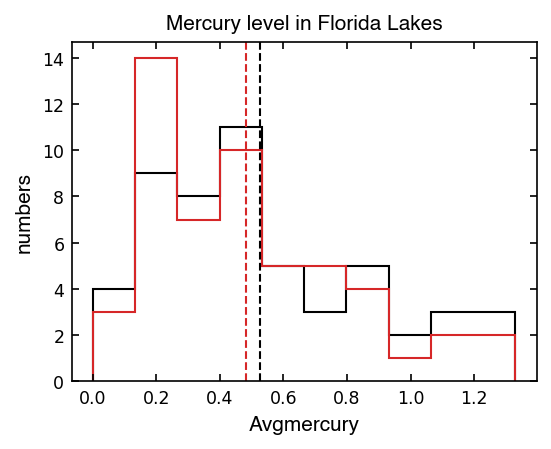

In [57]:
# plotting 
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax = f.subplots(1, 1)

ax.hist(AvgMercury, histtype='step', range=(0, np.max(AvgMercury)), bins=10, 
        color='black')

ax.axvline(np.mean(AvgMercury), lw=1, color='black', ls='--')

# random draw result
a_mc_array = rng.choice(AvgMercury, len(AvgMercury))

ax.hist(a_mc_array, histtype='step', range=(0, np.max(AvgMercury)), bins=10,
        color='tab:red')
ax.axvline(np.mean(a_mc_array), lw=1, color='tab:red', ls='--')

xlabel = 'Avgmercury'; ylabel = 'numbers'
set_plot_axis_label(ax, xlabel, ylabel)
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

Text(0.5, 1.0, 'Mercury level in Florida Lakes')

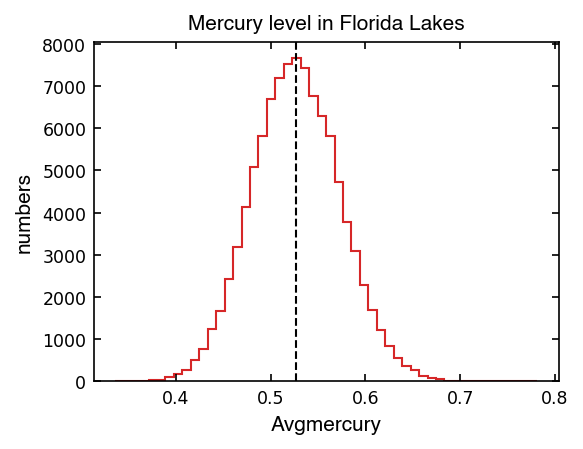

In [26]:
# plotting 
f = plt.figure(facecolor='white', figsize=(4,3), dpi=150 )
ax = f.subplots(1, 1)

ax.axvline(np.mean(AvgMercury), lw=1, color='black', ls='--')

# random draw result
sample_times = 100000

mean_collection = []
for _ in range(sample_times): 
        a_mc_array = rng.choice(AvgMercury, len(AvgMercury))
        mean_collection.append(np.mean(a_mc_array))

ax.hist(mean_collection, histtype='step', color='tab:red', bins=50)


xlabel = 'Avgmercury'; ylabel = 'numbers'
set_plot_axis_label(ax, xlabel, ylabel)
ax.set_title('Mercury level in Florida Lakes', size='medium', fontname='Helvetica')

In [58]:
print(f'mean: {np.mean(mean_collection):1.2f}')
print(f'std: {np.std(mean_collection):1.2f}')

print(f'50 %: {np.percentile(mean_collection, 50):1.2f}')
print(f'16 %: {np.percentile(mean_collection, 16):1.2f}')
print(f'84 %: {np.percentile(mean_collection, 84):1.2f}')

mean: 0.53
std: 0.05
50 %: 0.53
16 %: 0.48
84 %: 0.57


## [Assignment] What's the value for $\pi$?

In this assignment, you will need to use the MC method to estimate the values of $\pi$.

Assuming you have a quarter circle with the radius of 1 and a square that share it's edge with the quarter circle's 
radius (see the plot below). 

![Monte-Carlo pi](https://helloacm.com/wp-content/uploads/2015/11/Monte-Carlo01.jpg)

Therefore, we know:
$$
Area_{\rm quarter\ circle} = \pi r^2/4 \\
Area_{\rm square} = r^2
$$
The ratio of the two will be
$$
\frac{Area_{\rm quarter\ circle}}{Area_{\rm square}} = \frac{\pi r^2/4}{r^2} = \frac{\pi}{4}
$$
Rearange the equation and changes the area with the number of points we have:
$$
\pi = 4 \frac{Area_{\rm quarter\ circle}}{Area_{\rm square}} = 4 \frac{N_{\rm quarter\ circle}}{N_{\rm square}}
$$
where $N_{\rm quarter\ circle}$ is the number of points within the quarter circle and $N_{\rm square}$ is the number of points
within the square.

Tips:
1. You will need to generate two arrays with the random generator as the x and y axis of each points.
2. Calculate the number of points within the quarter circl and within the square
3. You get $\pi$ values by divide the two numbers and times 4

**Show that your $\pi$ has $< 1e-15$ difference from `np.pi`**

In [28]:
# [your code here]